<a href="https://colab.research.google.com/github/AURORARISE/MSSP-6070/blob/main/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set_style('whitegrid')

In [13]:
file_path = '/content/drive/MyDrive/MSSP6070/a. Assignments/Final Assignment/archive (Unzipped Files)/colleges/colleges.csv'
df = pd.read_csv(file_path)

In [14]:
print("Number of rows and columns of data:", df.shape)
print("The first 5 rows of data:")
print(df.head())

Number of rows and columns of data: (1948, 9)
The first 5 rows of data:
         date    state      county        city ipeds_id  \
0  2021-05-26  Alabama     Madison  Huntsville   100654   
1  2021-05-26  Alabama  Montgomery  Montgomery   100724   
2  2021-05-26  Alabama   Limestone      Athens   100812   
3  2021-05-26  Alabama         Lee      Auburn   100858   
4  2021-05-26  Alabama  Montgomery  Montgomery   100830   

                           college  cases  cases_2021 notes  
0           Alabama A&M University     41         NaN   NaN  
1         Alabama State University      2         NaN   NaN  
2          Athens State University     45        10.0   NaN  
3                Auburn University   2742       567.0   NaN  
4  Auburn University at Montgomery    220        80.0   NaN  


In [15]:
df.drop(columns=['ipeds_id', 'notes'], inplace=True, errors='ignore')

In [16]:
print("\nMissing value statistics:\n", df.isna().sum())


Missing value statistics:
 date            0
state           0
county          2
city            0
college         0
cases           0
cases_2021    337
dtype: int64


In [17]:
df['cases_2021'] = df['cases_2021'].fillna(0)
df['cases'] = df['cases'].fillna(0)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

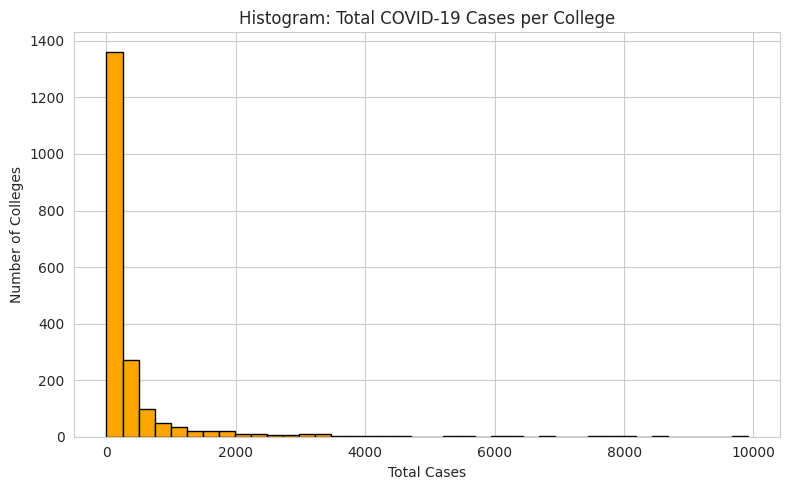

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(df['cases'], bins=40, color='orange', edgecolor='black')
plt.title('Histogram: Total COVID-19 Cases per College')
plt.xlabel('Total Cases')
plt.ylabel('Number of Colleges')
plt.tight_layout()
plt.show()

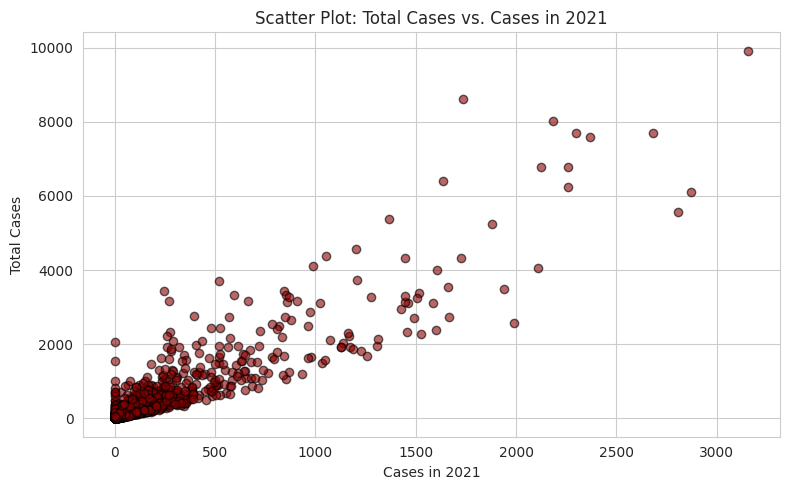

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(df['cases_2021'], df['cases'], c='darkred', alpha=0.6, edgecolor='black')
plt.title('Scatter Plot: Total Cases vs. Cases in 2021')
plt.xlabel('Cases in 2021')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

In [20]:
correlation = df['cases'].corr(df['cases_2021'])
print(f"Correlation coefficient (Total Cases vs. Cases in 2021): {correlation:.2f}")

Correlation coefficient (Total Cases vs. Cases in 2021): 0.91


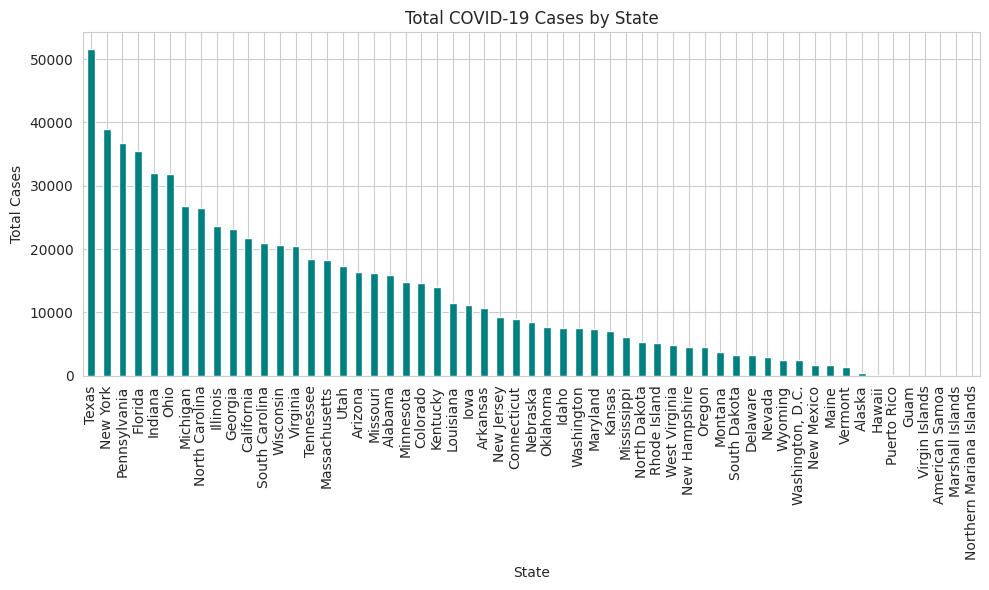

In [21]:
state_cases = df.groupby('state')['cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
state_cases.plot(kind='bar', color='teal')
plt.title('Total COVID-19 Cases by State')
plt.ylabel('Total Cases')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

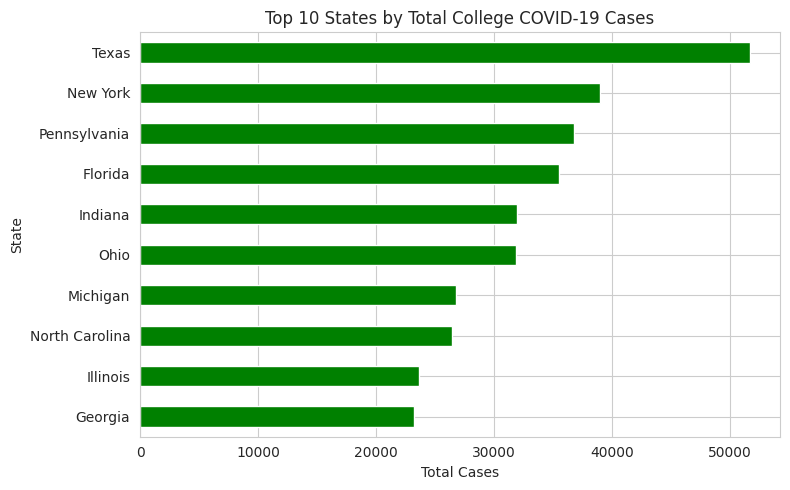

In [22]:
top_states = state_cases.head(10)[::-1]
plt.figure(figsize=(8, 5))
top_states.plot(kind='barh', color='green')
plt.title('Top 10 States by Total College COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [23]:
print("\nDescriptive statistics:")
print("Top 5 States:\n", state_cases.head(5))
print("Median Cases per College:", df['cases'].median())
print("Mean Cases per College:", df['cases'].mean())


Descriptive statistics:
Top 5 States:
 state
Texas           51632
New York        38967
Pennsylvania    36732
Florida         35499
Indiana         31937
Name: cases, dtype: int64
Median Cases per College: 114.5
Mean Cases per College: 363.53850102669406
